# Actividad - Estadística básica

* **Nombre:** José Ricardo Rosales Castañeda
* **Matrícula:** A01709449

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [60]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [42]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [43]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriorment.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [44]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Analisis de variables:
* **Name**: contiene nombre de libro, tipo string
* **Author**: contiene nombre del autor del libto, tipo string.
* **User Rating**: calificacion promedio del libro, numerico, rango[1-5], min: 3.3, max: 4.9
* **Reviews**: Número de reseñas del libro, numerico, rango[37-87841], min: 37, max: 87841
* **Price**: Precio del libro, numerico, rango[10.8-105], min: 10.8, max: 105
* **Year**: Año de publicación, numerico, rango[2009-2019] min: 2009, max: 2019
* **Genre**: Género literario, tipo string, rango[fiction-nonFiction]

Analisis de moda, media y mediana:
* basandome en la media se puede ver que en general estos libros tiene una califcacxion cercana o superior a 4.6, tienen un precio relativamente bajo y la mayoria fueron publicados en 2014

* Basandome en la desviacion estandar, se puede ver que en casi todas las variables numericas la std es menor a 10, siendo que en los diferentes libros las variables toman un valor muy similar, a excepcion de las reviews en donde la std es de 11731.

In [45]:
# correlacion entre las variables numericas mas relevantes
df2 = pd.read_csv('bestsellers with categories.csv', usecols=['User Rating', 'Reviews', 'Price', 'Genre'])
df2.corr()

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

**Respuesta:** en este caso yo considero que para el analisis la unica variable numerica q ue no consideraria relvante seria el año, ya que en lagunos casos lo podemos tomar como una variable cualitativa.

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
 
En este caso eliminaria la variable de año, ya que como menciona ntes e puede tomar como una variable cualitativa .

* ¿Existen variables que tengan datos extraños?

De lo anterior el unico dato extraño que veo es que existe libro que tiene precio de 0, por lo demas no

* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

Los rango en las varibales no son tan similares, ya que en algunos casos estan limitados, como en el rating donde son valores bajos y en otros caso no tiene limite como las reviews donde los valores suelen ser bastante altos, por lo que lo ideal es normalizar las variables.

* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Considero que en este caso no hay grupos pareciedos

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

Text(0.5, 1.05, 'Distribución de las variables numéricas por genero literario')

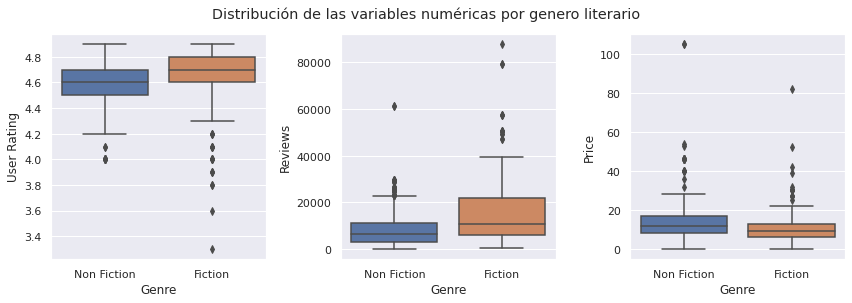

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(data=df2, y = 'User Rating', x='Genre', ax=axs[0])
sns.boxplot(data=df2, y = 'Reviews', ax=axs[1], x='Genre')
sns.boxplot(data=df2, y = 'Price', ax=axs[2], x='Genre')

plt.tight_layout()

plt.suptitle('Distribución de las variables numéricas por genero literario', y=1.05)

<Axes: >

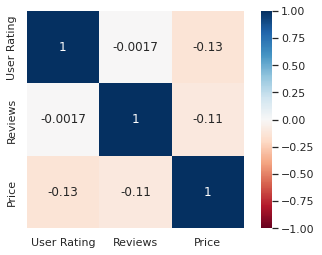

In [47]:
df2_corr = df2.corr()
sns.heatmap(data=df2_corr, vmin=-1, vmax = 1, cmap='RdBu', annot=True, square=True)

Text(0.5, 1.05, 'Gráfico de pares de las variables numéricas por género literario')

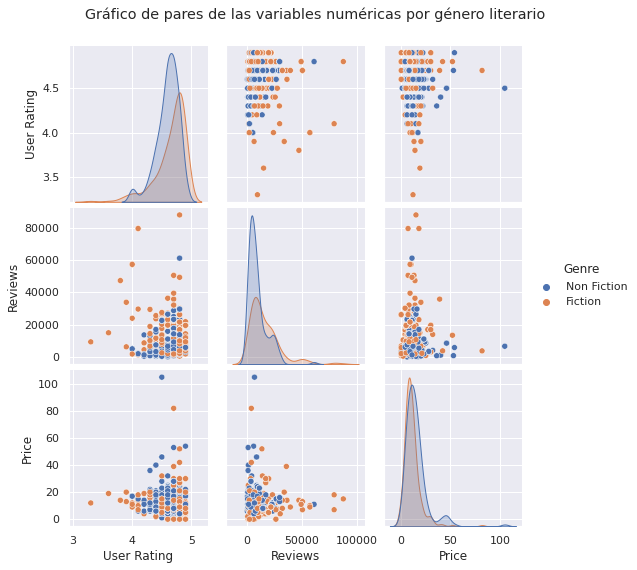

In [48]:
sns.pairplot(data=df2, hue='Genre')
plt.suptitle('Gráfico de pares de las variables numéricas por género literario', y=1.05)

**Conclusiones**

* De las graficas de caja se pude concluir que en el caso de User Rating, el 2 y tercer cuartil se encuentran en un rango de 4.5 - 4.8, cambiando de acuerdo al genero que pertenecen. Por otro lado en el caso de revies los mismos cuartiles estan en uin rango de 0 - 200000 y por ultimo en Price los cuartiles estan entre 10 y 20

* Del mapa de calor se puede concluir que no existe una relacion de causa ewfect muy fuerte en ninguna variable, siendo la mas furet positiva: N/A y negativa -0.13

* Y por ultimo de los graficos de dispersion se puede obervar que si existe un agrupamiento de los datos.

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

si, porque muesdtran donde se etsna concentrando mas los datos

- ¿Cómo obtuviste el valor de $k$ a usar?

Usando un ciclo for para probar con diferrentes valores para k, graficando el resultado de esos modelos y usando el punto de quiebre, es decir donde haya un mayor cambio en la pendiente.

- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

Mientras k sea mas bajo los centros serian mas representativos

- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

no serian tan representativos, ya que los datos variarian mucho unos de otros

- ¿Qué puedes decir de los datos basándose en los centros?

que los datos de cada variable tienden a agruparse alrededor de estos

In [49]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.

# normalizacion de variables para evitar problemas con rangos
numeric_cols = ['User Rating', 'Reviews',	'Price']
X = df.loc[:, numeric_cols]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,User Rating,Reviews,Price
0,0.359990,0.460453,-0.470810
1,-0.080978,-0.844786,0.821609
2,0.359990,0.599440,0.175400
3,0.359990,0.808050,-0.655441
4,0.800958,-0.365880,-0.101547


In [ ]:
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

for k in grupos:
    model = KMeans(n_clusters=k, random_state = 47)

    clusters = model.fit_predict(X_norm)

    wcss.append(model.inertia_)

    sil_score.append(silhouette_score(X_norm, clusters))

Text(0.5, 1.0, 'Silhouette Score')

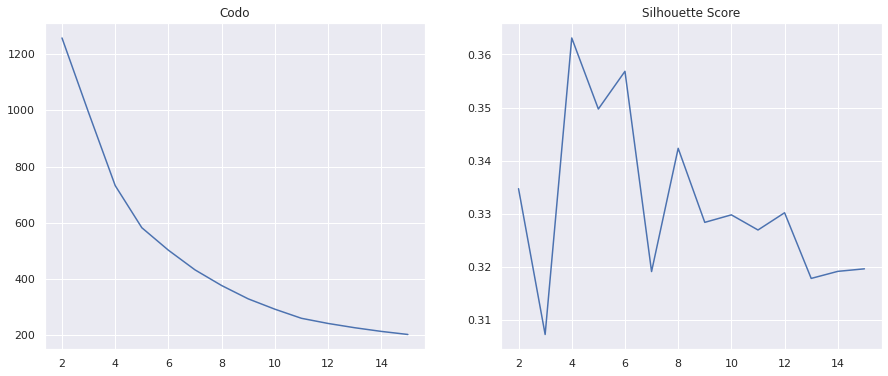

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(grupos, wcss)
axs[0].set_title('Codo')

axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

In [55]:
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
df2['Grupo'] = clusters.astype('str')
df2.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,User Rating,Reviews,Price,Genre,Grupo
0,4.7,17350,8,Non Fiction,0
1,4.6,2052,22,Fiction,2
2,4.7,18979,15,Non Fiction,0
3,4.7,21424,6,Fiction,0
4,4.8,7665,12,Non Fiction,2


Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

* Grupo 0 Libros muy baratos y muy buenos

* Grupo 1 Libros Baratos y entretenidos

* Grupo 2 Libros baratos y muy buenos

* Grupo 3 Libros caros y entretenidos

In [57]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.
df2.groupby('Grupo').mean()

,User Rating,Reviews,Price
Grupo,,,
0,4.693846,27444.646154,9.084615
1,4.232143,8631.666667,12.416667
2,4.698065,6753.977419,11.900000
3,4.538462,7219.538462,49.692308


In [58]:
df2.groupby('Grupo').std()

,User Rating,Reviews,Price
Grupo,,,
0,0.184161,12779.526505,3.833825
1,0.208933,9097.337152,5.013736
2,0.118770,4145.890023,6.819423
3,0.144435,6978.798305,18.750508


Del analisis anterior podemos ver que 

* el grupo 0 esta compuesto por libros con el segundo mejor rating del top50, baratos y muy vendidos

* el grupo 1 esta compuesto por libros con menor rating del top50, menos vendidos y mas caros pero siguen siendo baratos

* el grupo 2 esta compuesto por libros con el mejopr rating del top 50, siguen estando baratos pero se venden menos

* el grupo 3 esta compuesto por libros con el tercer mejor rating del top50, los segundos menos vendidos y los mas caros


Text(0.5, 1.05, '4 grupos de libros')

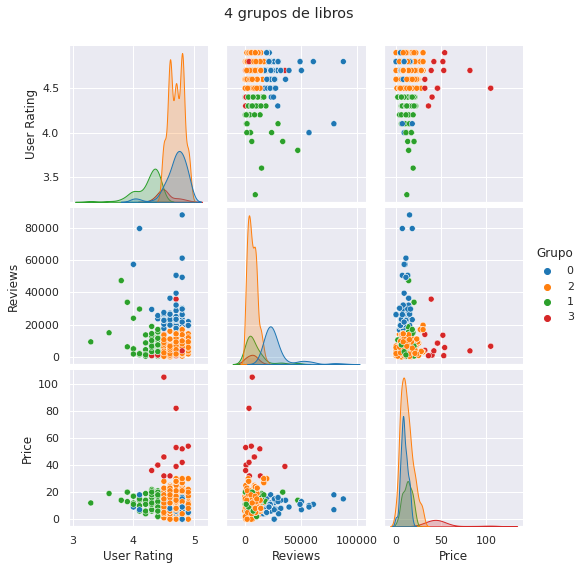

In [59]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.

sns.pairplot(data=df2, hue='Grupo', palette='tab10')
plt.suptitle('4 grupos de libros', y=1.05)

In [61]:
fig = px.scatter_3d(df2, x = 'User Rating', y = 'Reviews', 
                    z = 'Price', 
                    title='4 grupos de libros',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()